Let's say that we want to analyze the video stimuli from scan `27203-4-7`.

---

To get the necessary rows into the tables in `foundation.stimulus.video`, use the `fill` method of `VisualScanVideo` method in `foundation.stimulus.fill_scan`

In [1]:
from foundation.stimulus.fill_scan import VisualScanVideo

Connecting ewang@at-database.ad.bcm.edu:3306


In [2]:
# These are the primary keys for `VisualScanVideo`

VisualScanVideo.primary_key

['animal_id', 'session', 'scan_idx']

In [3]:
# There are currently 55 keys for animal `27203`

VisualScanVideo & 'animal_id=27203'

55 x ['animal_id', 'session', 'scan_idx']

In [4]:
# Let's take a look at those keys

(VisualScanVideo & 'animal_id=27203').key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file
27203,2,1
27203,3,1
27203,3,2
27203,3,3
27203,3,4
27203,3,5
27203,3,6
27203,3,7
27203,3,8
27203,4,1


In [5]:
# Now let's restrict the keys to the particular scan that we are interested in

VisualScanVideo & 'animal_id=27203 and session=4 and scan_idx=7'

1 x ['animal_id', 'session', 'scan_idx']

In [6]:
# Let's fill the video stimulus tables with stimuli from this scan

(VisualScanVideo & 'animal_id=27203 and session=4 and scan_idx=7').fill()

Clip -- No new keys to insert
Monet2 -- No new keys to insert
Trippy -- No new keys to insert
GaborSequence -- No new keys to insert
DotSequence -- No new keys to insert
RdkSequence -- No new keys to insert
Frame -- No new keys to insert


0it [00:00, ?it/s]


Now the tables in `foundation.stimulus.video` should have all of the necessary rows for the stimuli that were presented in this scan.

---

In this scan, we presented 6 natural movie oracle clips. Let's load the videos from the tables that we just filled.

In [7]:
# First, let's identify the condition hashes of those 6 clips from the upstream pipeline.

from foundation.virtual.bridge import pipe_stim, pipe_netflix

conds = pipe_stim.Clip & (pipe_netflix.OracleSet & 'season=1') & (pipe_stim.Condition & 'stimulus_version=3')
conds = conds.fetch("KEY", order_by=conds.primary_key)
conds

[{'condition_hash': '5zQTb77qI+ig8rigx1XU'},
 {'condition_hash': '7UETOWO5Z8aWuHDBJ2GG'},
 {'condition_hash': 'ecUQJtcERZJGdqza1k7h'},
 {'condition_hash': 'GjCMo2GkJp6y5vricadg'},
 {'condition_hash': 'KXdTNAGMo1gCWz2Ge8zr'},
 {'condition_hash': 'Oup5uAZxF2G7zEJkT+ui'}]

In [8]:
# Now let's query the `Video` link table for those `Clip` rows

from foundation.stimulus.video import Video

videos = Video.query("Clip", conds)
videos

video_id video stimulus,video_type video type,video_ts automatic timestamp
2f6c3fb40cb8a0122df93a9189b4f226,Clip,2023-05-26 11:41:14
1e6c15801b79dd312a45cc79abfd4191,Clip,2023-05-26 11:41:14
34d5118f59c7da6c58a4c9062f8caa96,Clip,2023-05-26 11:41:14
6edca736626f68999951c9bfbcb3c15c,Clip,2023-05-26 11:41:14
587404e6d2cf3bd1a92bbbd687ac89af,Clip,2023-05-26 11:41:14
a02933a092438b50bb69ebcb83d43cbc,Clip,2023-05-26 11:41:14


{'video_id': '1e6c15801b79dd312a45cc79abfd4191'}


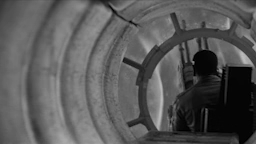

{'video_id': '2f6c3fb40cb8a0122df93a9189b4f226'}


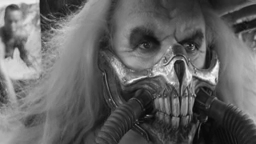

{'video_id': '34d5118f59c7da6c58a4c9062f8caa96'}


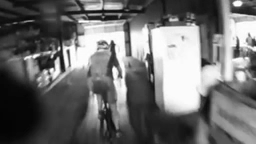

{'video_id': '587404e6d2cf3bd1a92bbbd687ac89af'}


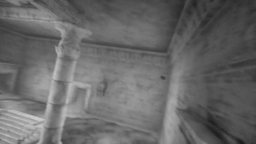

{'video_id': '6edca736626f68999951c9bfbcb3c15c'}


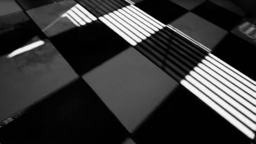

{'video_id': 'a02933a092438b50bb69ebcb83d43cbc'}


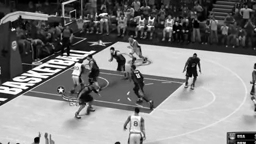

In [9]:
# Let's load and display the first frame of each video

for key in videos.fetch("KEY", order_by=videos.primary_key):
    
    vid = (Video & key).link.compute.video
    frame = vid[0]
    
    print(key)
    display(frame)